In [1]:
from GRASP import GRASP

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import dataset_config as dataset_config
from tqdm import tqdm
import math
dataConfig = dataset_config.DatasetConfig()

database = dataConfig.database
poi_dict = dataConfig.poi_dict
database_function = dataConfig.database_func
poi_cate_dict = dataConfig.poi_cate_dict

In [4]:
# 取消输出warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
import json
file_name = "final_datas/1-all_llm_data_output_202409011948_glm4air.json"

with open(file_name,'r', encoding='UTF-8') as f:
     cases_dataset = json.load(f)

all_results = cases_dataset
all_results

[{'request_id': 'request-1',
  'content': {'poi_name_list': [['天津酒店', '天津古文化街', '天津酒店'],
    ['天津酒店', '天津五大道', '天津酒店'],
    ['天津酒店', '天津意式风情区', '天津酒店']],
   'poi_cate_list': [['酒店', '景点', '酒店'],
    ['酒店', '景点', '酒店'],
    ['酒店', '景点', '酒店']],
   'poi_rec_time_list': [[1.0, 2.0, 1.0], [1.0, 2.0, 1.0], [1.0, 2.0, 1.0]],
   'poi_arrive_time_list': [['09:00:00', '09:30:00', '11:30:00'],
    ['09:00:00', '09:30:00', '11:30:00'],
    ['09:00:00', '09:30:00', '11:30:00']]}},
 {'request_id': 'request-2',
  'content': {'poi_name_list': [['天津酒店', '天津古文化街', '耳朵眼炸糕店', '天津文庙', '天津酒店'],
    ['天津酒店', '天津博物馆', '狗不理包子铺', '意式风情区', '天津酒店'],
    ['天津酒店', '瓷房子', '锅巴菜馆', '天津之眼', '天津酒店']],
   'poi_cate_list': [['酒店', '景点', '餐厅', '景点', '酒店'],
    ['酒店', '景点', '餐厅', '景点', '酒店'],
    ['酒店', '景点', '餐厅', '景点', '酒店']],
   'poi_rec_time_list': [[1.0, 2.0, 1.0, 2.0, 1.0],
    [1.0, 2.5, 1.0, 2.0, 1.0],
    [1.0, 2.0, 1.0, 2.5, 1.0]],
   'poi_arrive_time_list': [['09:00:00',
     '10:00:00',
     '12:00:00',
     '1

In [6]:
import json

with open('final_datas/5-analyze_json_input_glm4air_tp0_2_add_classify_layer.json', 'r', encoding='utf-8') as file:
    all_data = json.load(file)

all_data

[{'custom_id': 'request-1',
  'poi_case': {'poi_feature': '人文、历史、文化、多样',
   'route_num': 3,
   'poi_name_list': [],
   'catering_feature': '常规',
   'N_c_min': [1, 2, 2],
   'N_c_max': [10, 3, 2],
   'use_min_restaurant_gap': 10800,
   'time_feature': '慢节奏',
   'start_day_time': '09:00:00',
   'plan_max_time': 12,
   'tightness_w': 1.5},
  'user_query': {'request_id': 'request-1',
   'content': '我打算来一场人文历史之旅，为期3天，用轻松慢节奏的方式去感受各地的风土人情，吃点家常菜，每天从上午9点出发，玩个半天就足够了。'},
  'json_input': {'request_id': 'request-1',
   'content': {'N_c_min': [0, 2, 2],
    'N_c_max': [10, 2, 2],
    'use_min_restaurant_gap': 3,
    'poi_id_list': ['天津古文化街', '天津意式风情区', '天津五大道', '天津张学良故居', '天津瓷房子'],
    'route_num': 3,
    'start_end_poi': None,
    'start_day_time': '09:00:00',
    'plan_max_time': 6,
    'tightness_w': 1.5,
    'user_budget': 1000000000.0,
    'not_poi_list': []}},
  'time_cate': {'request_id': 'request-1', 'content': {'time_feature': '慢节奏'}},
  'catering_cate': {'request_id': 'request-1',
   'cont

In [7]:
#比对poi_list
count = 0
re_id1 = []
for index, value in enumerate(all_data):
    judge = True
    if value["poi_case"]["poi_name_list"]:
        # 判断poi_name是否为poi_id_list中某个值的子字符串，或poi_id_list中的某个值是否是poi_name的子字符串
        for poi_name in value["poi_case"]["poi_name_list"]:
            if not any(poi_name in poi_id or poi_id in poi_name for poi_id in [item for day_route in all_results[index]['content']['poi_name_list'] for item in day_route]):
                judge = False
                count += 1
                print(f"Mismatch at index {index} (custom_id: {value['custom_id']})")
                re_id1.append(value['custom_id'])
                print(f"poi_name {poi_name} does not match any item in json_input poi_id_list")
                break
    # if not judge:
    #     print(f"user_query:{value['user_query']['content']}")
    #     print(f"poi_case:{value['poi_case']['poi_name_list']}")
    #     print(f"json_input:{value['json_input']['content']['poi_id_list']}")
    #     print(f"results:{[item[poi_dict['poi_name']] for day_route in all_results[index]['results'] for item in day_route]}")
    #     print("------------------------------------------------------------")

print(f"Total mismatches where poi_name does not sufficiently match json_input poi_id_list: {count}")

Mismatch at index 253 (custom_id: request-254)
poi_name 天津劝业场 does not match any item in json_input poi_id_list
Mismatch at index 258 (custom_id: request-259)
poi_name 意大利风情区 does not match any item in json_input poi_id_list
Mismatch at index 264 (custom_id: request-265)
poi_name 天津劝业场 does not match any item in json_input poi_id_list
Mismatch at index 266 (custom_id: request-267)
poi_name 天津劝业场 does not match any item in json_input poi_id_list
Mismatch at index 268 (custom_id: request-269)
poi_name 天津劝业场 does not match any item in json_input poi_id_list
Mismatch at index 270 (custom_id: request-271)
poi_name 天津劝业场 does not match any item in json_input poi_id_list
Mismatch at index 273 (custom_id: request-274)
poi_name 天津劝业场 does not match any item in json_input poi_id_list
Mismatch at index 276 (custom_id: request-277)
poi_name 意大利风情区 does not match any item in json_input poi_id_list
Mismatch at index 277 (custom_id: request-278)
poi_name 意大利风情区 does not match any item in json_input p

In [8]:
#比对poi_list
count = 0
re_id1 = []
for index, value in enumerate(all_data):
    judge = True
    if value["poi_case"]["poi_name_list"]:
        # 判断poi_name是否为poi_id_list中某个值的子字符串，或poi_id_list中的某个值是否是poi_name的子字符串
        for poi_name in value['json_input']['content']['poi_id_list']:
            if not any(poi_name in poi_id or poi_id in poi_name for poi_id in [item for day_route in all_results[index]['content']['poi_name_list'] for item in day_route]):
                judge = False
                count += 1
                print(f"Mismatch at index {index} (custom_id: {value['custom_id']})")
                re_id1.append(value['custom_id'])
                print(f"poi_name {poi_name} does not match any item in json_input poi_id_list")
                break
    # if not judge:
    #     print(f"user_query:{value['user_query']['content']}")
    #     print(f"poi_case:{value['poi_case']['poi_name_list']}")
    #     print(f"json_input:{value['json_input']['content']['poi_id_list']}")
    #     print(f"results:{[item[poi_dict['poi_name']] for day_route in all_results[index]['results'] for item in day_route]}")
    #     print("------------------------------------------------------------")

print(f"Total mismatches where poi_name does not sufficiently match json_input poi_id_list: {count}")

Mismatch at index 132 (custom_id: request-133)
poi_name 瓷房子 does not match any item in json_input poi_id_list
Mismatch at index 258 (custom_id: request-259)
poi_name 意大利风情区 does not match any item in json_input poi_id_list
Mismatch at index 276 (custom_id: request-277)
poi_name 意大利风情区 does not match any item in json_input poi_id_list
Mismatch at index 277 (custom_id: request-278)
poi_name 意大利风情区 does not match any item in json_input poi_id_list
Mismatch at index 279 (custom_id: request-280)
poi_name 意大利风情区 does not match any item in json_input poi_id_list
Mismatch at index 280 (custom_id: request-281)
poi_name 意大利风情区 does not match any item in json_input poi_id_list
Mismatch at index 282 (custom_id: request-283)
poi_name 意大利风情区 does not match any item in json_input poi_id_list
Mismatch at index 284 (custom_id: request-285)
poi_name 意大利风情区 does not match any item in json_input poi_id_list
Mismatch at index 285 (custom_id: request-286)
poi_name 意大利风情区 does not match any item in json_inpu

In [9]:
#route_num 满足情况
count = 0
for index, value in enumerate(all_data):
    if value["poi_case"]["route_num"] != len(all_results[index]['content']['poi_name_list']):
        count += 1
        print(f"Mismatch at index {index} (custom_id: {value['custom_id']})")
        print(f"route_num: {value['poi_case']['route_num']}, len(poi_name_list): {len(all_results[index]['content']['poi_name_list'])}")
print(f"Total mismatches where route_num does not match len(poi_name_list): {count}")

Mismatch at index 481 (custom_id: request-482)
route_num: 1, len(poi_name_list): 2
Mismatch at index 482 (custom_id: request-483)
route_num: 1, len(poi_name_list): 3
Mismatch at index 483 (custom_id: request-484)
route_num: 1, len(poi_name_list): 2
Mismatch at index 484 (custom_id: request-485)
route_num: 1, len(poi_name_list): 2
Mismatch at index 485 (custom_id: request-486)
route_num: 1, len(poi_name_list): 2
Mismatch at index 486 (custom_id: request-487)
route_num: 1, len(poi_name_list): 4
Mismatch at index 490 (custom_id: request-491)
route_num: 1, len(poi_name_list): 3
Mismatch at index 491 (custom_id: request-492)
route_num: 1, len(poi_name_list): 2
Mismatch at index 492 (custom_id: request-493)
route_num: 1, len(poi_name_list): 2
Mismatch at index 493 (custom_id: request-494)
route_num: 1, len(poi_name_list): 2
Mismatch at index 494 (custom_id: request-495)
route_num: 1, len(poi_name_list): 2
Mismatch at index 495 (custom_id: request-496)
route_num: 1, len(poi_name_list): 2
Mism

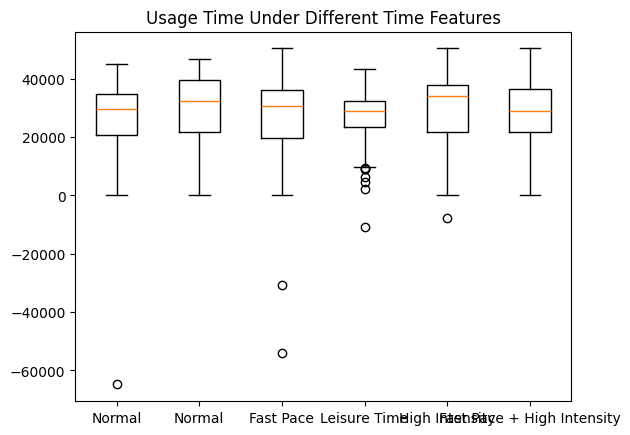

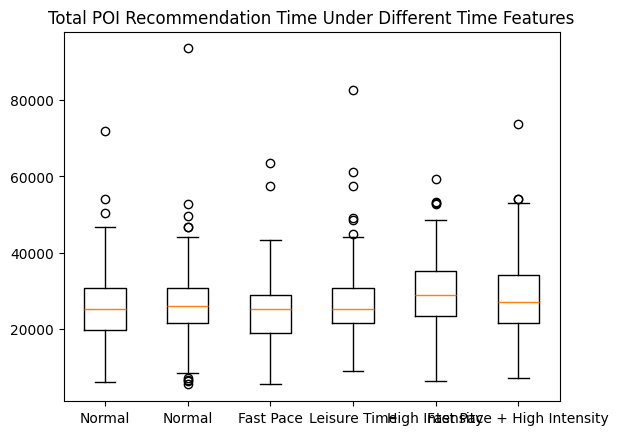

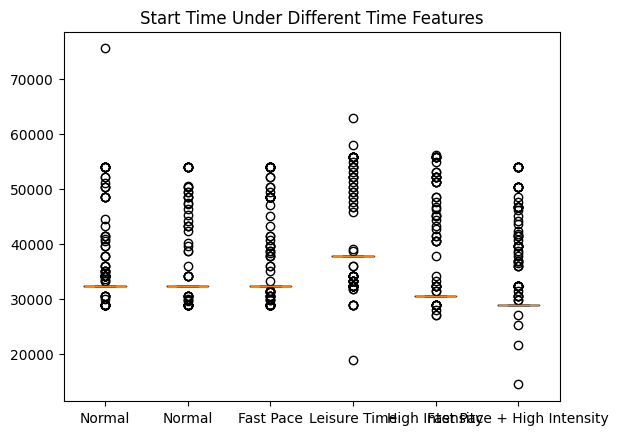

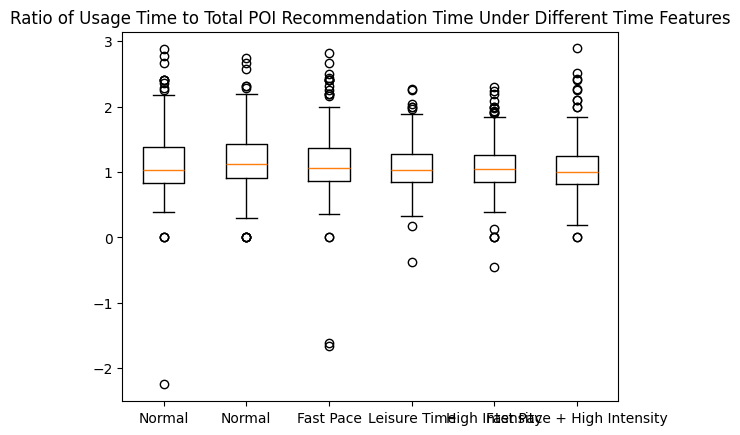

In [10]:
import json
import time
import matplotlib.pyplot as plt

def time_to_seconds(time_str):
    """
    Convert a time string in HH:MM:SS or HH:SS format to seconds.
    
    :param time_str: A string representing time, e.g., "12:34:56" or "12:34".
    :return: The total number of seconds as an integer.
    """
    parts = time_str.split(':')
    if len(parts) == 3:
        hours, minutes, seconds = parts
    elif len(parts) == 2:
        hours, minutes = parts
        seconds = 0
    else:
        raise ValueError("Invalid time format")
    
    # Convert all time components to integers and calculate total seconds
    total_seconds = int(hours) * 3600 + int(minutes) * 60 + int(seconds)
    return total_seconds

# Initialize lists for different time features
use_time = [[] for i in range(6)]
start_time = [[] for i in range(6)]
poi_total_rec_time = [[] for i in range(6)]

# Assuming 'all_data' and 'all_results' are defined with your data
for index, value in enumerate(all_data):
    time_feature = value["poi_case"]['time_feature']
    if time_feature == "慢节奏":
        idx = 0
    elif time_feature == "正常":
        idx = 1
    elif time_feature == "快节奏":
        idx = 2
    elif time_feature == "时间休闲":
        idx = 3
    elif time_feature == "时间高强度":
        idx = 4
    else:
        idx = 5

    use_time[idx].append(sum([(time_to_seconds(item[-1]) - time_to_seconds(item[0])) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    start_time[idx].append(sum([time_to_seconds(item[0]) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    poi_total_rec_time[idx].append(sum([item*3600 if item <= 24 else item for day_route in all_results[index]['content']['poi_rec_time_list'] for item in day_route]) / len(all_results[index]['content']['poi_rec_time_list']))

# Save data
time_feature_results = {
    'use_time': use_time,
    'start_time': start_time,
    'poi_total_rec_time': poi_total_rec_time
}

with open(f'time_feature_results_{time.strftime("%Y%m%d%H%M%S")}.json', 'w') as f:
    json.dump(time_feature_results, f)

# Boxplot for use_time
plt.boxplot(use_time, labels=['Normal', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'])
plt.title('Usage Time Under Different Time Features')
plt.show()

# Boxplot for poi_total_rec_time
plt.boxplot(poi_total_rec_time, labels=['Normal', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'])
plt.title('Total POI Recommendation Time Under Different Time Features')
plt.show()

# Boxplot for start_time
plt.boxplot(start_time, labels=['Normal', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'])
plt.title('Start Time Under Different Time Features')
plt.show()

# Boxplot for the ratio of total_use_time to poi_total_rec_time
ratios = [[x/y if y != 0 else 0 for x, y in zip(sub_use_time, sub_poi_time)] for sub_use_time, sub_poi_time in zip(use_time, poi_total_rec_time)]
plt.boxplot(ratios, labels=['Normal', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'])
plt.title('Ratio of Usage Time to Total POI Recommendation Time Under Different Time Features')
plt.show()

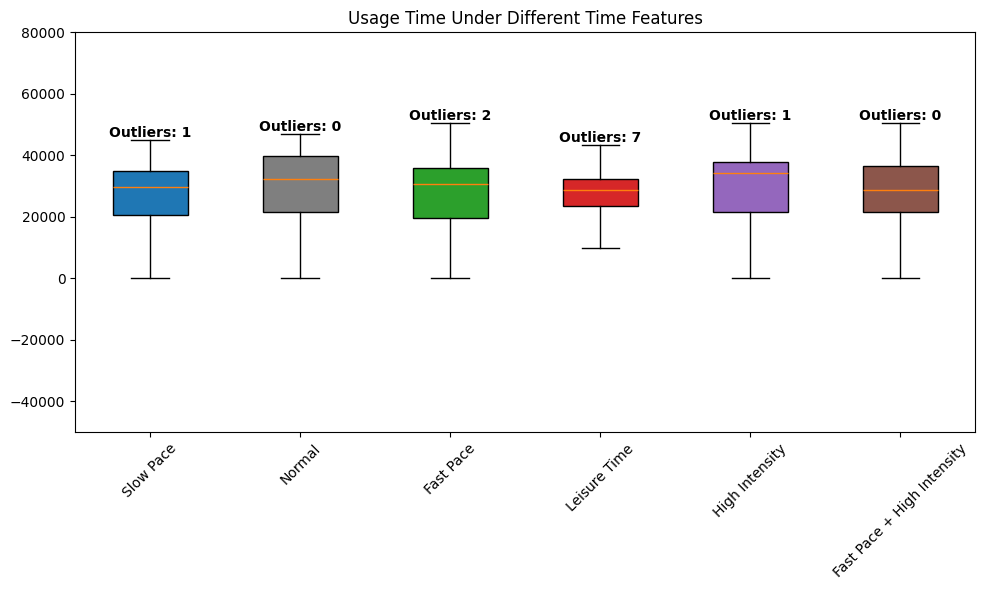

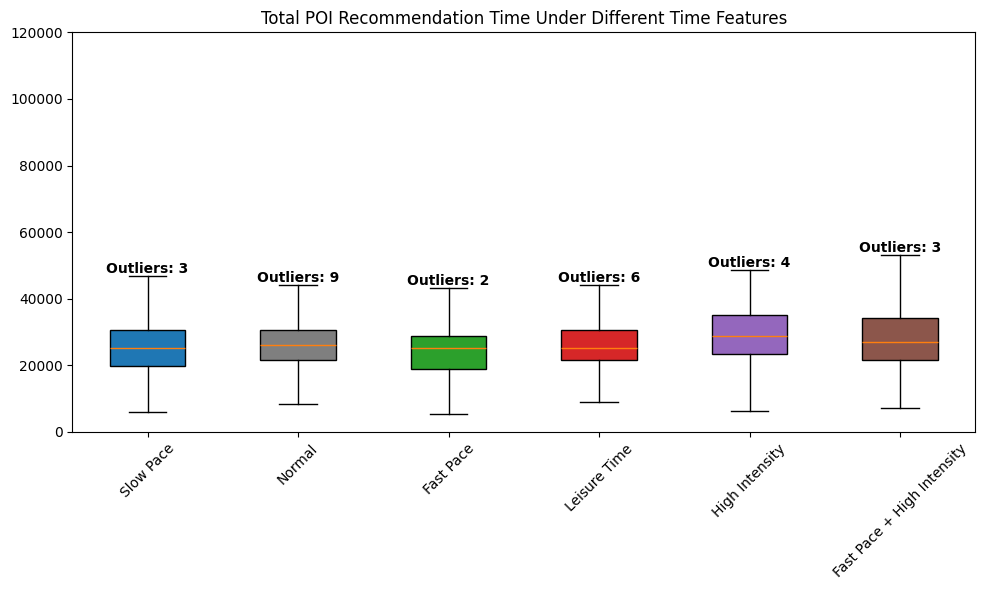

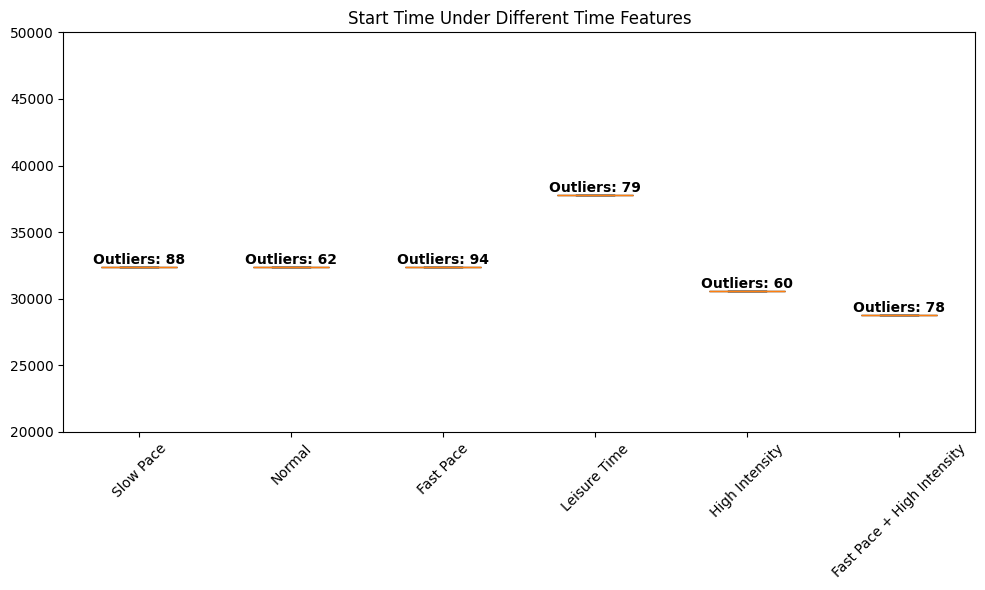

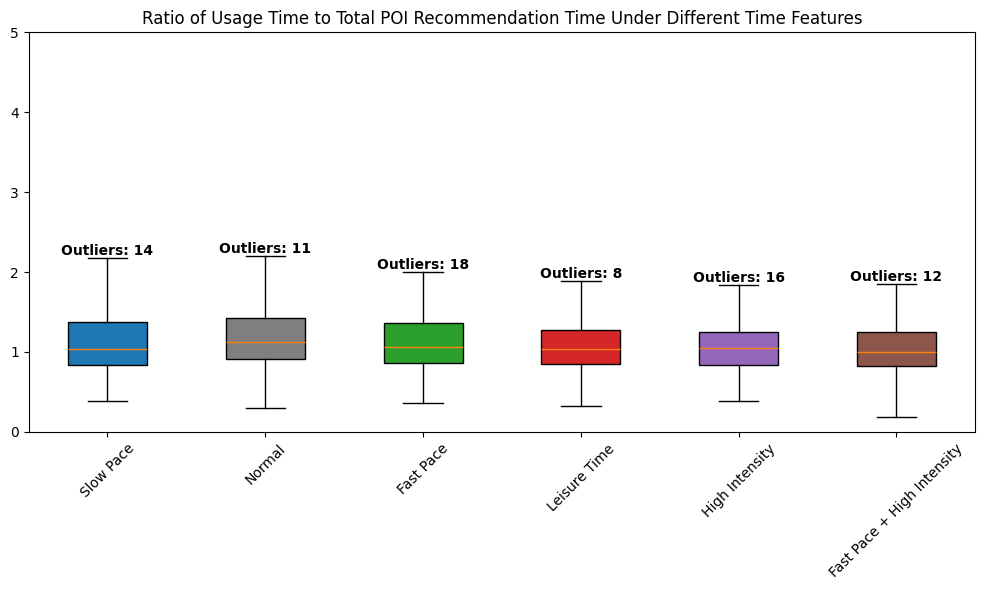

In [11]:
import json
import time
import matplotlib.pyplot as plt
import numpy as np

# Define a function to count outliers
def count_outliers(data, whisker=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - whisker * iqr
    upper_bound = q3 + whisker * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return len(outliers)

# Initialize lists for different time features
use_time = [[] for i in range(6)]
start_time = [[] for i in range(6)]
poi_total_rec_time = [[] for i in range(6)]

# Assuming 'all_data' and 'all_results' are defined with your data
for index, value in enumerate(all_data):
    time_feature = value["poi_case"]['time_feature']
    if time_feature == "慢节奏":
        idx = 0
    elif time_feature == "正常":
        idx = 1
    elif time_feature == "快节奏":
        idx = 2
    elif time_feature == "时间休闲":
        idx = 3
    elif time_feature == "时间高强度":
        idx = 4
    else:
        idx = 5

    use_time[idx].append(sum([(time_to_seconds(item[-1]) - time_to_seconds(item[0])) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    start_time[idx].append(sum([time_to_seconds(item[0]) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    poi_total_rec_time[idx].append(sum([item*3600 if item <= 24 else item for day_route in all_results[index]['content']['poi_rec_time_list'] for item in day_route]) / len(all_results[index]['content']['poi_rec_time_list']))

# Save data
time_feature_results = {
    'use_time': use_time,
    'start_time': start_time,
    'poi_total_rec_time': poi_total_rec_time
}

with open(f'time_feature_results_{time.strftime("%Y%m%d%H%M%S")}.json', 'w') as f:
    json.dump(time_feature_results, f)

# Scientific color palette
colors = ['tab:blue', 'tab:grey', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Function to create boxplots without outliers
def create_boxplot(data, title, labels, y_range=None):
    plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
    result = plt.boxplot(data, labels=labels, patch_artist=True, showfliers=False)
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap
    for patch, color in zip(result['boxes'], colors):
        patch.set_facecolor(color)
    # Set y-axis limits if provided
    if y_range:
        plt.ylim(y_range)
    # Counting and displaying outliers
    for i, sub_data in enumerate(data):
        num_outliers = count_outliers(sub_data)
        y_max = result['whiskers'][2*i+1].get_ydata()[1]  # Upper whisker
        plt.text(i+1, y_max, f'Outliers: {num_outliers}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='bottom')
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

# Define a y-axis range common to all plots (adjust as necessary based on your data analysis)
common_y_range = (-50000, 80000)  # Example range

# Create and display boxplots for each feature with a fixed y-axis range
create_boxplot(use_time, 'Usage Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=common_y_range)
create_boxplot(poi_total_rec_time, 'Total POI Recommendation Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=(0, 120000))
create_boxplot(start_time, 'Start Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=(20000, 50000))
ratios = [[x/y if y != 0 else 0 for x, y in zip(sub_use_time, sub_poi_time)] for sub_use_time, sub_poi_time in zip(use_time, poi_total_rec_time)]
create_boxplot(ratios, 'Ratio of Usage Time to Total POI Recommendation Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=(0,5))

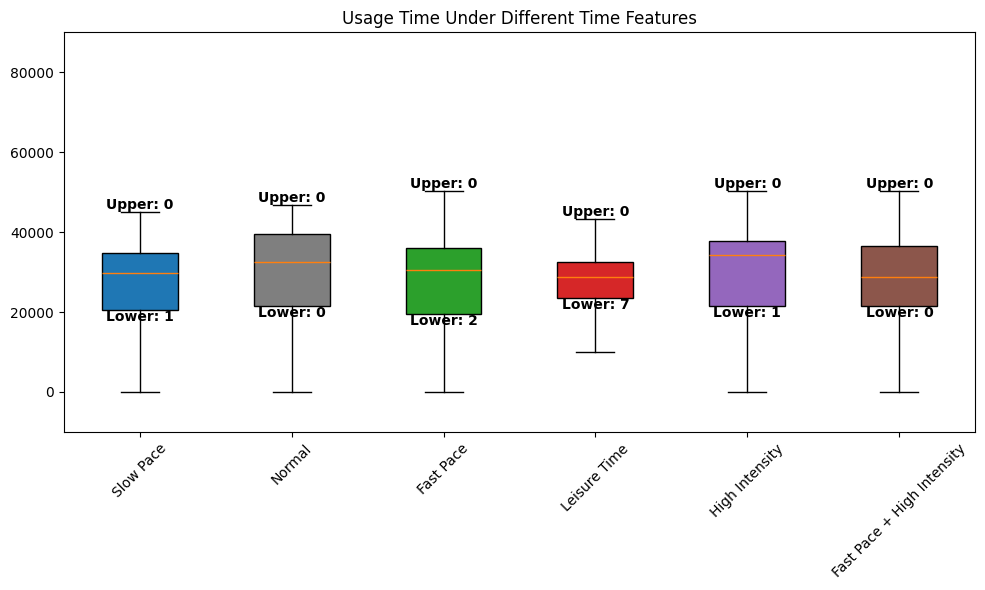

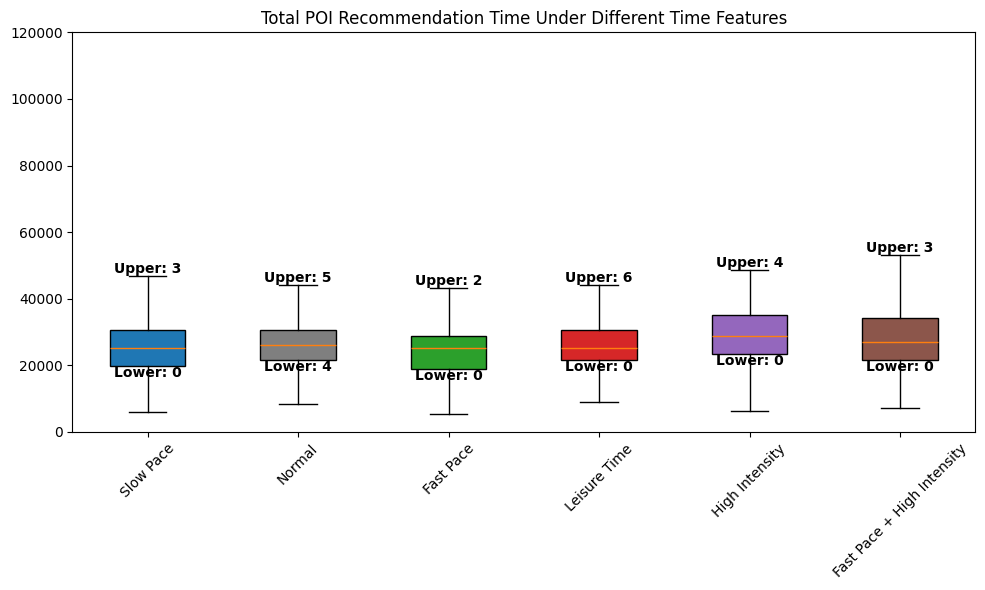

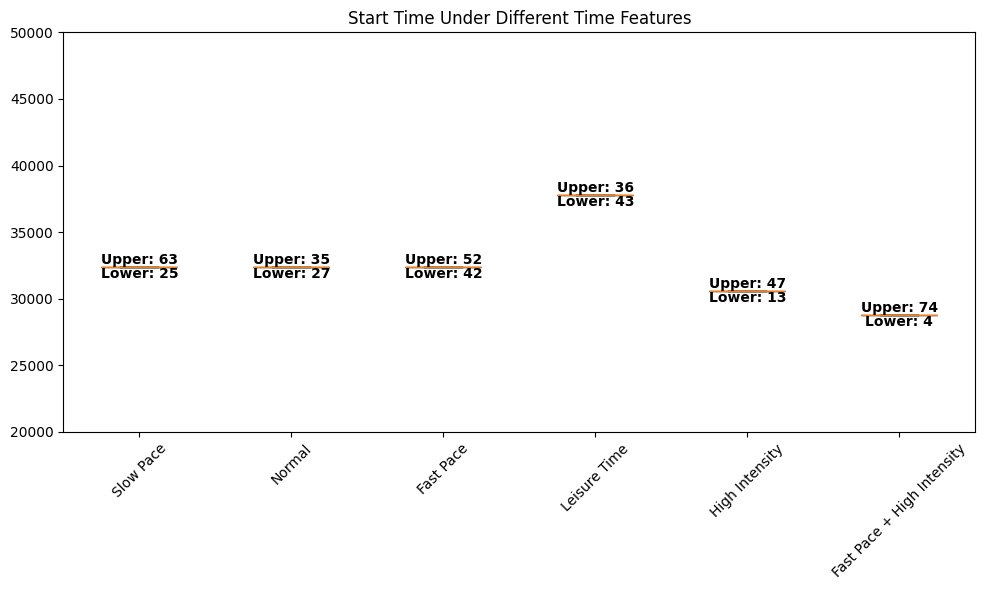

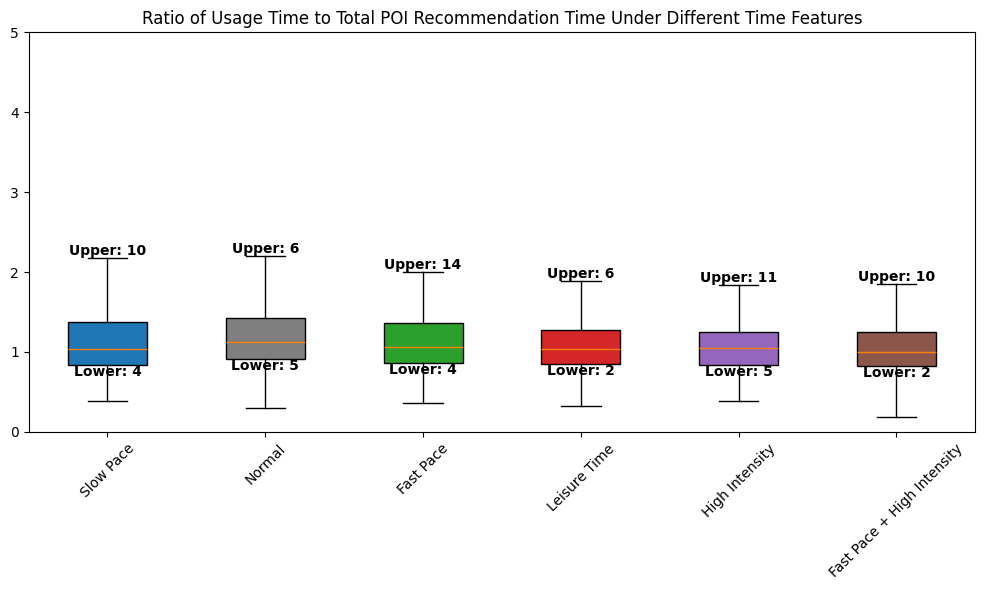

In [12]:
import json
import time
import matplotlib.pyplot as plt
import numpy as np

# Define a function to count outliers separately
def count_outliers(data, whisker=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - whisker * iqr
    upper_bound = q3 + whisker * iqr
    lower_outliers = [x for x in data if x < lower_bound]
    upper_outliers = [x for x in data if x > upper_bound]
    return len(lower_outliers), len(upper_outliers)

# Initialize lists for different time features
use_time = [[] for i in range(6)]
start_time = [[] for i in range(6)]
poi_total_rec_time = [[] for i in range(6)]

# Assuming 'all_data' and 'all_results' are defined with your data
for index, value in enumerate(all_data):
    time_feature = value["poi_case"]['time_feature']
    if time_feature == "慢节奏":
        idx = 0
    elif time_feature == "正常":
        idx = 1
    elif time_feature == "快节奏":
        idx = 2
    elif time_feature == "时间休闲":
        idx = 3
    elif time_feature == "时间高强度":
        idx = 4
    else:
        idx = 5

    use_time[idx].append(sum([(time_to_seconds(item[-1]) - time_to_seconds(item[0])) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    start_time[idx].append(sum([time_to_seconds(item[0]) for item in all_results[index]['content']['poi_arrive_time_list']]) / len(all_results[index]['content']['poi_arrive_time_list']))
    poi_total_rec_time[idx].append(sum([item*3600 if item <= 24 else item for day_route in all_results[index]['content']['poi_rec_time_list'] for item in day_route]) / len(all_results[index]['content']['poi_rec_time_list']))

# Save data
time_feature_results = {
    'use_time': use_time,
    'start_time': start_time,
    'poi_total_rec_time': poi_total_rec_time
}

with open(f'time_feature_results_{time.strftime("%Y%m%d%H%M%S")}.json', 'w') as f:
    json.dump(time_feature_results, f)

# Scientific color palette
colors = ['tab:blue', 'tab:grey', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Function to create boxplots without outliers but with outlier counts
def create_boxplot(data, title, labels, y_range=None):
    plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
    result = plt.boxplot(data, labels=labels, patch_artist=True, showfliers=False)
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap
    for patch, color in zip(result['boxes'], colors):
        patch.set_facecolor(color)
    # Set y-axis limits if provided
    if y_range:
        plt.ylim(y_range)
    # Counting and displaying outliers
    for i, sub_data in enumerate(data):
        lower_outliers, upper_outliers = count_outliers(sub_data)
        y_max = result['whiskers'][2*i+1].get_ydata()[1]  # Upper whisker
        y_min = result['whiskers'][2*i].get_ydata()[0]   # Lower whisker
        plt.text(i+1, y_max, f'Upper: {upper_outliers}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='bottom')
        plt.text(i+1, y_min, f'Lower: {lower_outliers}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='top')
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

# Define a y-axis range common to all plots (adjust as necessary based on your data analysis)
common_y_range = (-10000, 90000)  # Example range for some plots

# Create and display boxplots for each feature with a fixed y-axis range
create_boxplot(use_time, 'Usage Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=common_y_range)
create_boxplot(poi_total_rec_time, 'Total POI Recommendation Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=(0, 120000))
create_boxplot(start_time, 'Start Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=(20000, 50000))
ratios = [[x/y if y != 0 else 0 for x, y in zip(sub_use_time, sub_poi_time)] for sub_use_time, sub_poi_time in zip(use_time, poi_total_rec_time)]
create_boxplot(ratios, 'Ratio of Usage Time to Total POI Recommendation Time Under Different Time Features', ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity'], y_range=(0,5))

In [13]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Example variable: use_time
# Replace 'use_time' with 'start_time', 'poi_total_rec_time', 'ratios' for other variables

# Normality Test
normality_results = [stats.shapiro(group) for group in use_time]
print("Normality Test Results (p-values):", [res.pvalue for res in normality_results])

# Homogeneity of Variances Test
levene_result = stats.levene(*use_time)
print(f"Levene's Test Result: Statistic = {levene_result.statistic}, p-value = {levene_result.pvalue}")

# ANOVA or Kruskal-Wallis Test
if all(res.pvalue > 0.05 for res in normality_results) and levene_result.pvalue > 0.05:
    f_val, p_val = stats.f_oneway(*use_time)
    print(f"ANOVA Result: F = {f_val}, p-value = {p_val}")
    if p_val < 0.05:
        # Post-hoc Test (Tukey's HSD)
        merged_data = np.concatenate(use_time)
        groups = np.concatenate([[i] * len(group) for i, group in enumerate(use_time)])
        tukey_result = pairwise_tukeyhsd(merged_data, groups)
        print(tukey_result)
else:
    h_val, p_val = stats.kruskal(*use_time)
    print(f"Kruskal-Wallis Result: H = {h_val}, p-value = {p_val}")
    if p_val < 0.05:
        # Post-hoc test for non-parametric data (Dunn's test can be done using an external library)
        print("Significant results, consider post-hoc testing with Dunn's test.")

Normality Test Results (p-values): [np.float64(2.2081005053379405e-16), np.float64(3.7529077583364126e-12), np.float64(5.0544277728476845e-15), np.float64(2.1728065424583312e-13), np.float64(8.83434233919779e-10), np.float64(9.134242036754427e-08)]
Levene's Test Result: Statistic = 22.972610193533303, p-value = 1.3621043732593351e-22
Kruskal-Wallis Result: H = 60.29536137484946, p-value = 1.05608077086932e-11
Significant results, consider post-hoc testing with Dunn's test.


Normality Test Results (p-values): [np.float64(2.2081005053379405e-16), np.float64(3.7529077583364126e-12), np.float64(5.0544277728476845e-15), np.float64(2.1728065424583312e-13), np.float64(8.83434233919779e-10), np.float64(9.134242036754427e-08)]
Levene's Test Result: Statistic = 22.972610193533303, p-value = 1.3621043732593351e-22
Kruskal-Wallis Result: H = 60.29536137484946, p-value = 1.05608077086932e-11
Dunn's test p-values:
          1             2         3             4             5         6
1  1.000000  1.195988e-02  1.000000  9.974358e-02  1.443813e-03  1.000000
2  0.011960  1.000000e+00  0.005507  1.947242e-08  1.000000e+00  0.333021
3  1.000000  5.506773e-03  1.000000  1.836948e-01  5.966272e-04  1.000000
4  0.099744  1.947242e-08  0.183695  1.000000e+00  5.620650e-10  0.002346
5  0.001444  1.000000e+00  0.000597  5.620650e-10  1.000000e+00  0.069164
6  1.000000  3.330206e-01  1.000000  2.345638e-03  6.916393e-02  1.000000


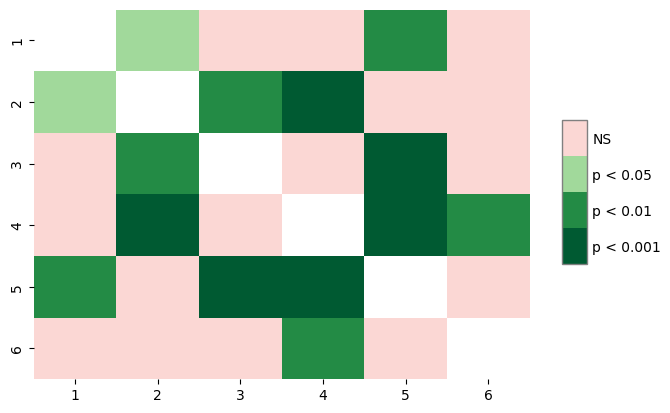

In [14]:
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import json
import time

# Example data loading and preparation steps
# Make sure your data is loaded into use_time, start_time, poi_total_rec_time, ratios as lists of lists

# Function to perform statistical tests
def perform_statistical_tests(data, group_labels):
    # Normality Test
    normality_results = [stats.shapiro(group) for group in data]
    print("Normality Test Results (p-values):", [res.pvalue for res in normality_results])

    # Homogeneity of Variances Test
    levene_result = stats.levene(*data)
    print(f"Levene's Test Result: Statistic = {levene_result.statistic}, p-value = {levene_result.pvalue}")

    # ANOVA or Kruskal-Wallis Test
    if all(res.pvalue > 0.05 for res in normality_results) and levene_result.pvalue > 0.05:
        f_val, p_val = stats.f_oneway(*data)
        print(f"ANOVA Result: F = {f_val}, p-value = {p_val}")
        if p_val < 0.05:
            # Post-hoc Test (Tukey's HSD)
            merged_data = np.concatenate(data)
            groups = np.concatenate([[i] * len(group) for i, group in enumerate(data)])
            tukey_result = pairwise_tukeyhsd(merged_data, groups)
            print(tukey_result)
    else:
        h_val, p_val = stats.kruskal(*data)
        print(f"Kruskal-Wallis Result: H = {h_val}, p-value = {p_val}")
        if p_val < 0.05:
            # Post-hoc test for non-parametric data (Dunn's test)
            merged_data = np.concatenate(data)
            groups = np.concatenate([[i] * len(group) for i, group in enumerate(data)])
            dunn_result = sp.posthoc_dunn([group for group in data], p_adjust='bonferroni')
            print("Dunn's test p-values:")
            print(dunn_result)
            # Plotting the significant pairwise comparisons
            sp.sign_plot(dunn_result)

# Perform statistical tests on your datasets
group_labels = ['Slow Pace', 'Normal', 'Fast Pace', 'Leisure Time', 'High Intensity', 'Fast Pace + High Intensity']

# Example calls to the function
# Ensure your datasets like 'use_time' are loaded correctly before calling this function
perform_statistical_tests(use_time, group_labels)
# perform_statistical_tests(start_time, group_labels)
# perform_statistical_tests(poi_total_rec_time, group_labels)
# perform_statistical_tests(ratios, group_labels)

Normality Test Results (p-values): [np.float64(8.406931649636008e-34), np.float64(1.468317291698913e-34), np.float64(2.6049735879957533e-32), np.float64(3.630360424300129e-31), np.float64(9.133257141201661e-35), np.float64(1.3333195309509888e-32)]
Levene's Test Result: Statistic = 1.843783471077913, p-value = 0.10108801193798302
Kruskal-Wallis Result: H = 1185.834501683238, p-value = 3.4376598814538e-254
Dunn's test p-values:
              1             2             3              4              5  \
1  1.000000e+00  1.000000e+00  1.000000e+00   2.809748e-39   7.246009e-35   
2  1.000000e+00  1.000000e+00  1.000000e+00   4.118136e-45   9.172854e-30   
3  1.000000e+00  1.000000e+00  1.000000e+00   1.673949e-43   4.264285e-31   
4  2.809748e-39  4.118136e-45  1.673949e-43   1.000000e+00  3.614863e-146   
5  7.246009e-35  9.172854e-30  4.264285e-31  3.614863e-146   1.000000e+00   
6  2.698691e-69  5.196718e-62  6.255363e-64  1.128074e-210   2.786642e-06   

               6  
1   2.69869

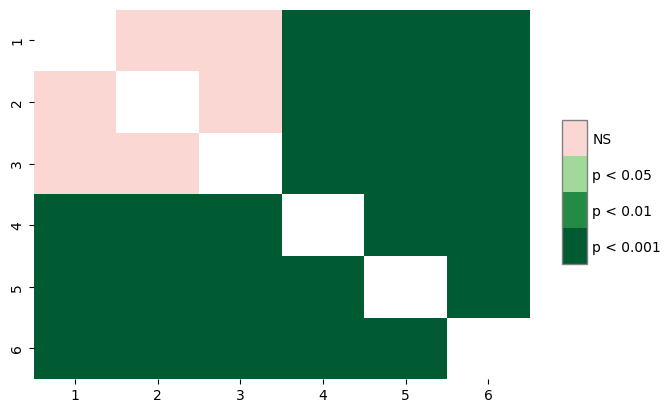

In [15]:
perform_statistical_tests(start_time, group_labels)

Normality Test Results (p-values): [np.float64(2.3108670068028025e-07), np.float64(2.4795788161375183e-14), np.float64(6.997736973698812e-06), np.float64(2.0676301743850117e-12), np.float64(0.48417497085976424), np.float64(2.0533962887849283e-05)]
Levene's Test Result: Statistic = 5.992480654252109, p-value = 1.618339188760275e-05
Kruskal-Wallis Result: H = 69.94756894961522, p-value = 1.0508629938025956e-13
Dunn's test p-values:
              1         2             3         4             5         6
1  1.000000e+00  1.000000  1.000000e+00  1.000000  4.881905e-08  0.021414
2  1.000000e+00  1.000000  4.564749e-02  1.000000  5.223228e-05  0.840230
3  1.000000e+00  0.045647  1.000000e+00  0.105327  4.324787e-13  0.000016
4  1.000000e+00  1.000000  1.053273e-01  1.000000  1.382605e-05  0.440586
5  4.881905e-08  0.000052  4.324787e-13  0.000014  1.000000e+00  0.095233
6  2.141389e-02  0.840230  1.638255e-05  0.440586  9.523267e-02  1.000000


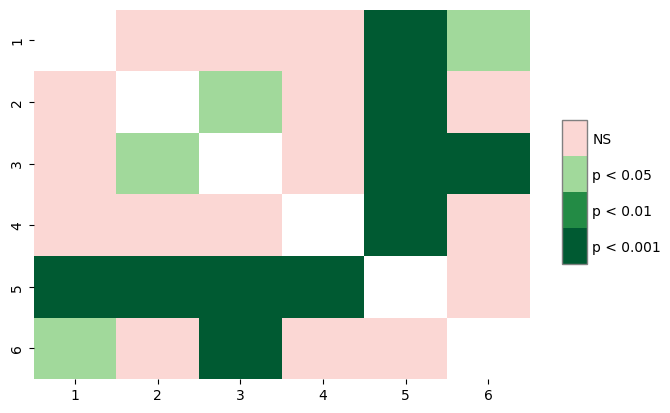

In [16]:
perform_statistical_tests(poi_total_rec_time, group_labels)

Normality Test Results (p-values): [np.float64(1.4124865333450324e-15), np.float64(5.060582061444019e-06), np.float64(2.1291382177252e-15), np.float64(5.5516657630547956e-06), np.float64(1.1444765379185291e-07), np.float64(1.3597130276521877e-10)]
Levene's Test Result: Statistic = 5.125603872973234, p-value = 0.00011114797094666337
Kruskal-Wallis Result: H = 28.611110459615606, p-value = 2.763724347143027e-05
Dunn's test p-values:
          1         2         3         4         5         6
1  1.000000  0.173539  1.000000  1.000000  1.000000  0.336040
2  0.173539  1.000000  1.000000  0.003175  0.005706  0.000023
3  1.000000  1.000000  1.000000  0.854612  1.000000  0.039538
4  1.000000  0.003175  0.854612  1.000000  1.000000  1.000000
5  1.000000  0.005706  1.000000  1.000000  1.000000  1.000000
6  0.336040  0.000023  0.039538  1.000000  1.000000  1.000000


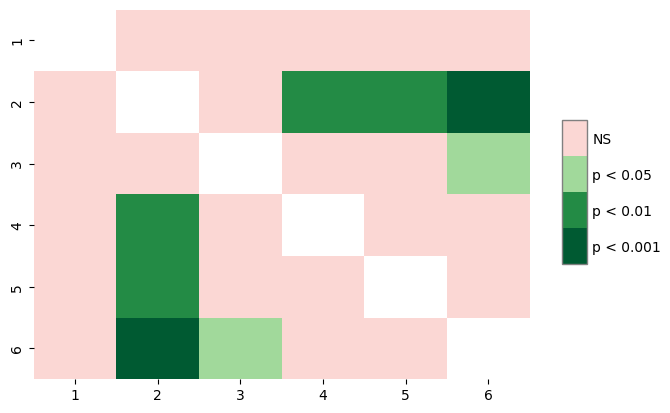

In [17]:
perform_statistical_tests(ratios, group_labels)

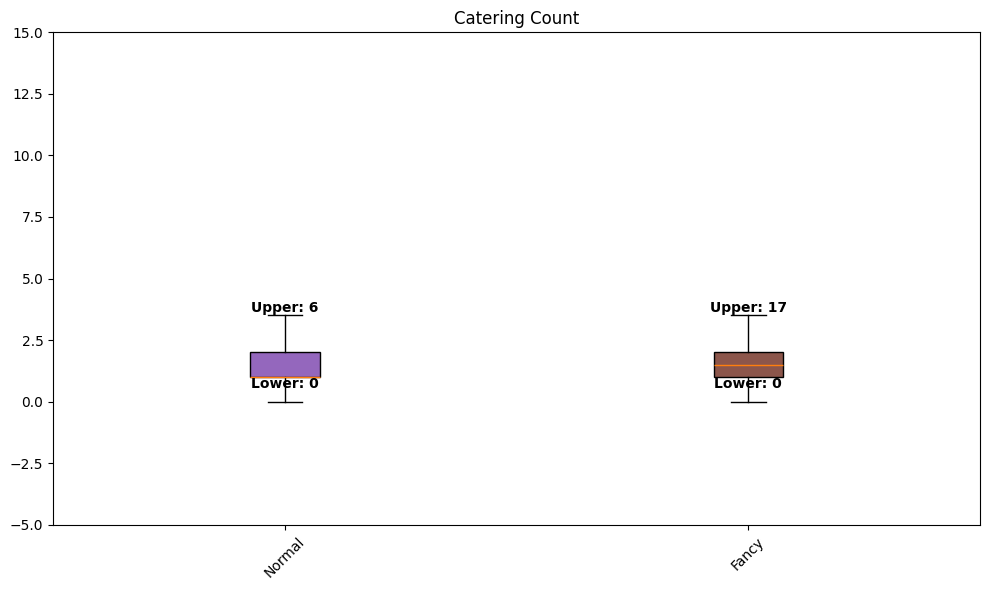

In [18]:
import json
import time
import matplotlib.pyplot as plt
import numpy as np

# Define a function to count outliers separately
def count_outliers(data, whisker=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - whisker * iqr
    upper_bound = q3 + whisker * iqr
    lower_outliers = [x for x in data if x < lower_bound]
    upper_outliers = [x for x in data if x > upper_bound]
    return len(lower_outliers), len(upper_outliers)

# Initialize lists for different time features
catering_count = [[] for _ in range(2)]

# Assuming 'all_data' and 'all_results' are defined with your data
for index, value in enumerate(all_data):
    catering_feature = value["poi_case"]['catering_feature']
    if catering_feature == "常规":
        idx = 0
    elif catering_feature == "美食":
        idx = 1

    catering_count[idx].append(sum([1 if item == '餐厅' else 0 for day_route in all_results[index]['content']['poi_cate_list'] for item in day_route]) / len(all_results[index]['content']['poi_cate_list']))

# Save data
catering_feature_results = {
    "catering_count": catering_count
}

# Scientific color palette
colors = ['tab:purple', 'tab:brown']

# Function to create boxplots without outliers but with outlier counts
def create_boxplot(data, title, labels, y_range=None):
    plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
    result = plt.boxplot(data, labels=labels, patch_artist=True, showfliers=False)
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap
    for patch, color in zip(result['boxes'], colors):
        patch.set_facecolor(color)
    # Set y-axis limits if provided
    if y_range:
        plt.ylim(y_range)
    # Counting and displaying outliers
    for i, sub_data in enumerate(data):
        lower_outliers, upper_outliers = count_outliers(sub_data)
        y_max = result['whiskers'][2*i+1].get_ydata()[1]  # Upper whisker
        y_min = result['whiskers'][2*i].get_ydata()[0]   # Lower whisker
        plt.text(i+1, y_max, f'Upper: {upper_outliers}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='bottom')
        plt.text(i+1, y_min, f'Lower: {lower_outliers}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='top')
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

# Define a y-axis range common to all plots (adjust as necessary based on your data analysis)
common_y_range = (-5, 15)  # Example range for some plots

# Create and display boxplots for each feature with a fixed y-axis range
create_boxplot(catering_count, 'Catering Count', ['Normal', 'Fancy'], y_range=common_y_range)

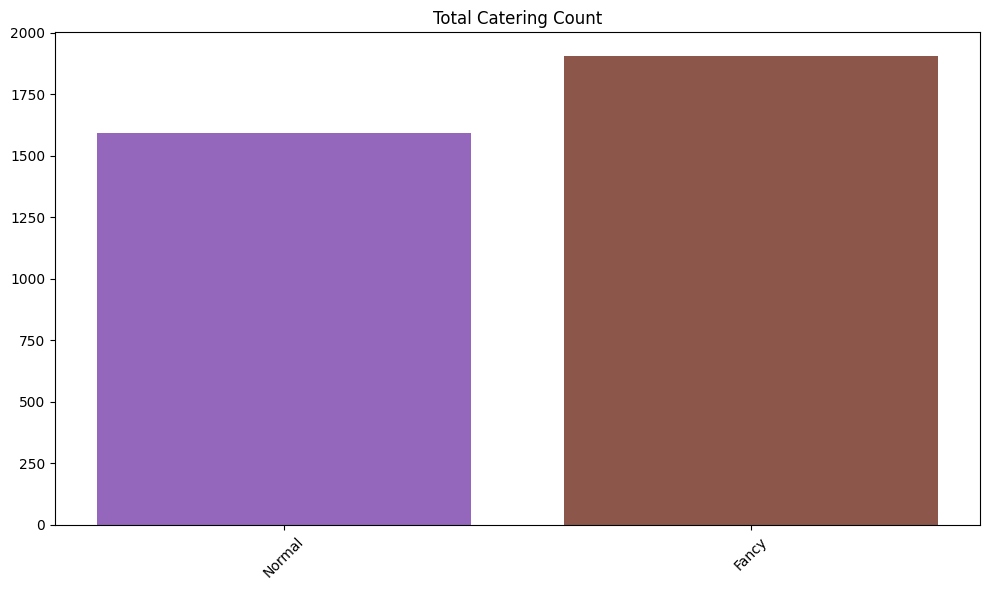

In [19]:
# 绘制总数柱状图
plt.figure(figsize=(10, 6))  # 调整图表大小
plt.bar(['Normal', 'Fancy'], [sum(catering_count[0]), sum(catering_count[1])], color=colors)
plt.title('Total Catering Count')
plt.xticks(rotation=45)  # 旋转标签以防止重叠
plt.tight_layout()  # 调整布局以防止标签被剪切
plt.show()

Normality Test Results (p-values): [np.float64(3.3386002699513038e-25), np.float64(6.297713519334554e-29)]
Levene's Test Result: Statistic = 15.583332961930937, p-value = 8.121993643207711e-05
Kruskal-Wallis Result: H = 49.925036731746616, p-value = 1.5973340151227142e-12
Dunn's test p-values:
              1             2
1  1.000000e+00  1.597334e-12
2  1.597334e-12  1.000000e+00


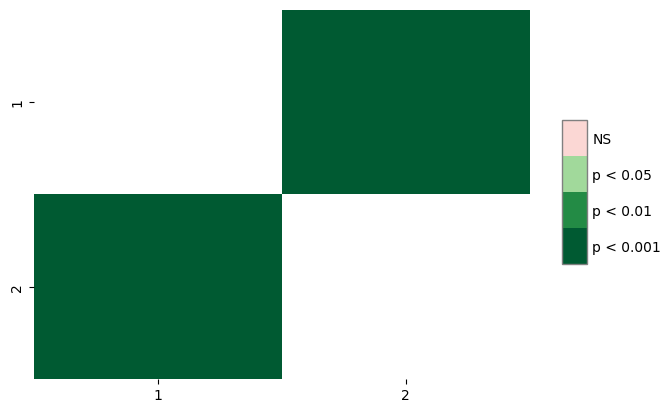

In [20]:
#差异性检验
group_labels_catering = ['Normal', 'Fancy']
perform_statistical_tests(catering_count, group_labels_catering)